In [1]:
import tensorflow as tf
import src.input_pipeline as ip
from src.pooling import *
from src.restore_model import *
from src.verify import *
from PIL import Image
import numpy as np


In [2]:
session = tf.Session()

In [3]:
file_name = ["data/test_batch.bin"]
pipeline = ip.DataPipeline(file_name)
x, y = pipeline.get_batch_op()

In [4]:
tf.train.start_queue_runners(sess=session)

[<Thread(Thread-4, started daemon 139901630666496)>,
 <Thread(Thread-5, started daemon 139901622273792)>]

In [5]:
model = build_model(session, x, "exp_2", tf.nn.relu)

In [6]:
conved_1 = model._convo_1
pooled_1 = model._max_pool_1
switches_1 = model._max_switches_1
with tf.variable_scope("", reuse=True):
    kernel_1 = tf.get_variable(shape=[5, 5, 3, 64], name="convo_1_weights")
    
conved_2 = model._convo_2
pooled_2 = model._max_pool_2
switches_2 = model._max_switches_2
with tf.variable_scope("", reuse=True):
    kernel_2 = tf.get_variable(shape=[2, 2, 64, 64], name="convo_2_weights")

In [7]:
unpooled_2 = unpooling(pooled_2, switches_2, [100, 8, 8, 64], [100, 16, 16, 64])
deconvo_relu_2 = tf.nn.relu(unpooled_2)
deconvo_2 = tf.nn.conv2d_transpose(deconvo_relu_2, kernel_2, [100, 16, 16, 64], strides=[1, 1, 1, 1])
unpooled_2_1 = unpooling(deconvo_2, switches_1, [100, 16, 16, 64], [100, 32, 32, 64])
deconvo_relu_2_1 = tf.nn.relu(unpooled_2_1)
deconvo_2_1 = tf.nn.conv2d_transpose(deconvo_relu_2_1, kernel_1, [100, 32, 32, 3], strides=[1, 1, 1, 1])

unpooled_1 = unpooling(pooled_1, switches_1, [100, 16, 16, 64], [100, 32, 32, 64])
deconvo_relu_1 = tf.nn.relu(unpooled_1)
deconvo_1 = tf.nn.conv2d_transpose(deconvo_relu_1, kernel_1, [100, 32, 32, 3], strides=[1, 1, 1, 1])

In [8]:
_x, a, b = session.run([x, deconvo_1, deconvo_2_1])

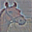

In [19]:
a_img = normalize_image(a[16, :, :, :])
img = Image.fromarray(a_img.astype(np.uint8), "RGB")
img

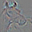

In [20]:
a_img = normalize_image(b[16, :, :, :])
img = Image.fromarray(a_img.astype(np.uint8), "RGB")
img

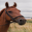

In [21]:
a_img = normalize_image(_x[16, :, :, :])
img = Image.fromarray(a_img.astype(np.uint8), "RGB")
img